In [3]:
import os
import sys

import joblib
from tensorflow.keras import callbacks
import matplotlib.pyplot as pyplot
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy
import pandas
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import seaborn
from keras.utils import to_categorical

WORKING_DIR_PATH = globals()['_dh'][0]
WORKING_DIR_PARENT_PATH = os.path.dirname(WORKING_DIR_PATH)
sys.path.insert(1, WORKING_DIR_PARENT_PATH)
from custom_module.utilities import *

In [2]:
features = pandas.read_csv(LOCAL_MOUNTED_DATASET_PATH + '/data/cleaned_features.csv', index_col=0)
features

,genre_label,lpc_1,lpc_2,lpc_3,lpc_4,mean_beats,mean_beats_timestamp,mean_db4_cA4,mean_db4_cD1,mean_db4_cD2,...,var_spec_centroid,var_spec_contrast_1,var_spec_contrast_2,var_spec_contrast_3,var_spec_contrast_4,var_spec_contrast_5,var_spec_contrast_6,var_spec_contrast_7,var_spec_rolloff,var_zcr
0,0,1.0,-1.178271,0.647402,-0.352129,649.120690,15.072553,-0.070889,2.706283e-09,-1.245192e-04,...,4.185230e+05,17.861575,21.121083,25.873245,13.038216,6.962883,7.988678,14.555389,1.564158e+06,0.002891
1,0,1.0,-1.086489,0.542333,-0.396561,617.465116,14.337512,-0.000740,8.956381e-06,-9.212386e-05,...,9.392262e+05,29.258739,24.407069,23.032866,18.185633,12.981837,12.461155,107.433159,2.076888e+06,0.005135
2,0,1.0,-1.365355,0.560194,-0.172092,631.428571,14.661743,-0.011143,-1.990486e-09,-7.116798e-06,...,6.335591e+05,14.853086,20.595163,23.554291,21.775710,11.043003,11.478725,17.035474,3.405313e+06,0.002481
3,0,1.0,-1.240807,0.505005,-0.190461,619.227273,14.378429,-0.002008,3.508618e-05,-2.028877e-05,...,4.953543e+05,25.631542,17.320487,26.199990,13.617381,7.566584,8.344646,142.327995,1.811020e+06,0.002283
4,0,1.0,-0.962111,0.201135,-0.206167,631.382979,14.660684,-0.001342,3.828920e-05,-4.344582e-05,...,1.073302e+06,35.138048,34.537389,32.614328,30.967176,19.603025,10.813280,102.154238,4.354818e+06,0.006124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,0,1.0,-1.878301,1.492194,-0.602686,1246.841270,14.475799,0.000255,-3.682523e-07,1.021450e-05,...,6.717626e+05,25.312044,16.848874,13.235958,17.875383,10.292653,7.975512,70.855880,3.494444e+06,0.001376
3295,0,1.0,-0.757695,0.322183,-0.531011,1269.770833,14.742011,0.000069,-3.853609e-07,3.565250e-05,...,9.118337e+06,36.373645,31.511738,26.118394,30.467805,48.009289,32.720426,98.557969,2.956056e+07,0.007543
3296,2,1.0,-1.862517,1.301521,-0.433298,1254.981818,14.570310,0.000784,-1.326012e-06,6.062675e-07,...,9.370093e+05,47.880472,15.887094,19.648933,20.805391,14.361217,9.615398,48.662283,6.126479e+06,0.000358
3297,2,1.0,-1.882439,1.470879,-0.573606,1272.877551,14.778080,-0.000206,-3.779051e-07,2.349206e-05,...,1.390328e+06,32.331749,18.345547,18.593669,21.698056,14.748304,8.958216,19.165002,5.990872e+06,0.001409


In [3]:
y = features.loc[:,'genre_label']
X = features.loc[:, features.columns.difference(['genre_label'])]
X

,lpc_1,lpc_2,lpc_3,lpc_4,mean_beats,mean_beats_timestamp,mean_db4_cA4,mean_db4_cD1,mean_db4_cD2,mean_db4_cD3,...,var_spec_centroid,var_spec_contrast_1,var_spec_contrast_2,var_spec_contrast_3,var_spec_contrast_4,var_spec_contrast_5,var_spec_contrast_6,var_spec_contrast_7,var_spec_rolloff,var_zcr
0,1.0,-1.178271,0.647402,-0.352129,649.120690,15.072553,-0.070889,2.706283e-09,-1.245192e-04,-0.000069,...,4.185230e+05,17.861575,21.121083,25.873245,13.038216,6.962883,7.988678,14.555389,1.564158e+06,0.002891
1,1.0,-1.086489,0.542333,-0.396561,617.465116,14.337512,-0.000740,8.956381e-06,-9.212386e-05,0.000984,...,9.392262e+05,29.258739,24.407069,23.032866,18.185633,12.981837,12.461155,107.433159,2.076888e+06,0.005135
2,1.0,-1.365355,0.560194,-0.172092,631.428571,14.661743,-0.011143,-1.990486e-09,-7.116798e-06,0.000019,...,6.335591e+05,14.853086,20.595163,23.554291,21.775710,11.043003,11.478725,17.035474,3.405313e+06,0.002481
3,1.0,-1.240807,0.505005,-0.190461,619.227273,14.378429,-0.002008,3.508618e-05,-2.028877e-05,-0.001993,...,4.953543e+05,25.631542,17.320487,26.199990,13.617381,7.566584,8.344646,142.327995,1.811020e+06,0.002283
4,1.0,-0.962111,0.201135,-0.206167,631.382979,14.660684,-0.001342,3.828920e-05,-4.344582e-05,0.000076,...,1.073302e+06,35.138048,34.537389,32.614328,30.967176,19.603025,10.813280,102.154238,4.354818e+06,0.006124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,1.0,-1.878301,1.492194,-0.602686,1246.841270,14.475799,0.000255,-3.682523e-07,1.021450e-05,-0.000065,...,6.717626e+05,25.312044,16.848874,13.235958,17.875383,10.292653,7.975512,70.855880,3.494444e+06,0.001376
3295,1.0,-0.757695,0.322183,-0.531011,1269.770833,14.742011,0.000069,-3.853609e-07,3.565250e-05,-0.000009,...,9.118337e+06,36.373645,31.511738,26.118394,30.467805,48.009289,32.720426,98.557969,2.956056e+07,0.007543
3296,1.0,-1.862517,1.301521,-0.433298,1254.981818,14.570310,0.000784,-1.326012e-06,6.062675e-07,-0.000024,...,9.370093e+05,47.880472,15.887094,19.648933,20.805391,14.361217,9.615398,48.662283,6.126479e+06,0.000358
3297,1.0,-1.882439,1.470879,-0.573606,1272.877551,14.778080,-0.000206,-3.779051e-07,2.349206e-05,-0.000132,...,1.390328e+06,32.331749,18.345547,18.593669,21.698056,14.748304,8.958216,19.165002,5.990872e+06,0.001409


In [4]:
y.value_counts(normalize=True)

2    0.333434
0    0.333434
1    0.333131
Name: genre_label, dtype: float64

In [5]:
predictors_all_label = X.columns.values
len(predictors_all_label)

217

In [6]:
ncols = len(predictors_all_label)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2639, 217), (660, 217), (2639,), (660,))

In [8]:
pipeline_estimator = normalization_pipeline(
    predictors_all_label)

In [9]:
pipeline_estimator = normalization_pipeline(
    predictors_all_label).fit(X_train)
X_test_scaled = pipeline_estimator.transform(X_test)
X_test_scaled.shape

(660, 217, 1)

In [10]:
# _, ncols, _ = X_test.shape

In [11]:
# one hot encoding our labels
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [12]:
y_train.shape, y_test.shape

((2639, 3), (660, 3))

In [13]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [14]:
# set log directory for tensorboard logs
root_logdir = os.path.join(os.curdir, "my_logs")

In [15]:
def get_run_logdir(): 
    '''
    get_run_logdir() generates subdirectory path with
    current date & time.
    '''   
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") 
    return os.path.join(root_logdir, run_id)

In [16]:
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'

In [17]:
# define tensorbaord callback
tensorboard_cb = callbacks.TensorBoard(run_logdir) 

In [18]:
# define earlt stopping callback
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                        restore_best_weights=True)

In [19]:
best_model_params = {
    'activation': 'selu',
    'dropout': 0.1,
    'filters': 16,
    'kernel_initializer': 'uniform',
    'n_hidden': 3,
    'n_neurons': 39,
    'optimizer': 'adam'
}

In [20]:
# wrap the function with keras wrapper
cnn_model = KerasClassifier(
    build_fn=set_shape_create_cnn_model
)

In [21]:
cnn_model = cnn_model.set_params(**best_model_params)

In [22]:
cnn_model_pipeline_estimator = Pipeline([
    ('pipeline_estimator', pipeline_estimator),
    ('clf', cnn_model)
])

In [23]:
cnn_model_pipeline_estimator = cnn_model_pipeline_estimator.fit(
    X_train, y_train, clf__batch_size=32,
    clf__validation_data=(X_test_scaled, y_test),
    clf__epochs=100, clf__callbacks=[early_stopping_cb]
)

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 215, 16)           64        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 107, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 105, 32)           1568      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 52, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 48)            4656      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 25, 48)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 23, 64)            9280    

In [24]:
# if you're not using a GPU, you can set n_jobs to something other than 1
# rscv = RandomizedSearchCV(pipeline_sp, param_dist, cv=3, n_jobs=1)

In [25]:
# %%timeit
# fit model
# search_1 = rscv.fit(X_train, y_train, clf__batch_size=32,
#                     clf__validation_data=(X_test_sp, y_test),
#                     clf__epochs=100, clf__callbacks=[early_stopping_cb])

In [26]:
# cnn_model = set_shape_create_cnn_model('cnn', ncols)(**best_model_params)

In [27]:
# history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=100,
#                   validation_data=(X_test, y_test),
#                   callbacks=[early_stopping_cb, tensorboard_cb])

In [28]:
# history.model

In [29]:
predicted_y_test = cnn_model_pipeline_estimator.predict_proba(X_test)

In [30]:
predicted_y_test

array([[0.00322226, 0.90647507, 0.09030271],
       [0.03059562, 0.645146  , 0.32425836],
       [0.2976408 , 0.15763998, 0.5447193 ],
       ...,
       [0.9913328 , 0.00353425, 0.00513282],
       [0.00630968, 0.89332724, 0.10036307],
       [0.0487994 , 0.31762636, 0.63357425]], dtype=float32)

In [31]:
GENRES = ['hiphop', 'rock', 'pop']

In [32]:
# check the number of targets per class
for i in range(3):
    print(str(i) + ' - ' +  GENRES[i] + ': ' +
          str(sum([1 for target in y_test if target[i] == 1])))
#     print(f'{i}: {sum([1 for target in y_test if target[i] == 1])}')

0 - hiphop: 210
1 - rock: 240
2 - pop: 210


In [33]:
# check the number of predicted values in each class
for i in range(3): 
    print(str(i) + ' - ' +  GENRES[i] + ': ' + 
          str(sum([1 for prediction in predicted_y_test if np.argmax(prediction) == i])))


0 - hiphop: 215
1 - rock: 184
2 - pop: 261


In [34]:
# calculate the confusion matrix 
# row: actual
# columns: predicted
conf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(predicted_y_test, 1))
conf_matrix

array([[176,   2,  32],
       [ 13, 151,  76],
       [ 26,  31, 153]])

In [35]:
# create a dataframe of the confusion matrix with genre labels for readability 
confusion_df = pandas.DataFrame(conf_matrix)
confusion_df

,0,1,2
0,176,2,32
1,13,151,76
2,26,31,153


In [36]:
GENRES_MAP = {
    0: 'hiphop',
    1: 'rock',
    2: 'pop'
}

In [37]:
# rename rows and columns with genre labels
confusion_df = confusion_df.rename(columns=GENRES_MAP)
confusion_df.index = confusion_df.columns
confusion_df

,hiphop,rock,pop
hiphop,176,2,32
rock,13,151,76
pop,26,31,153


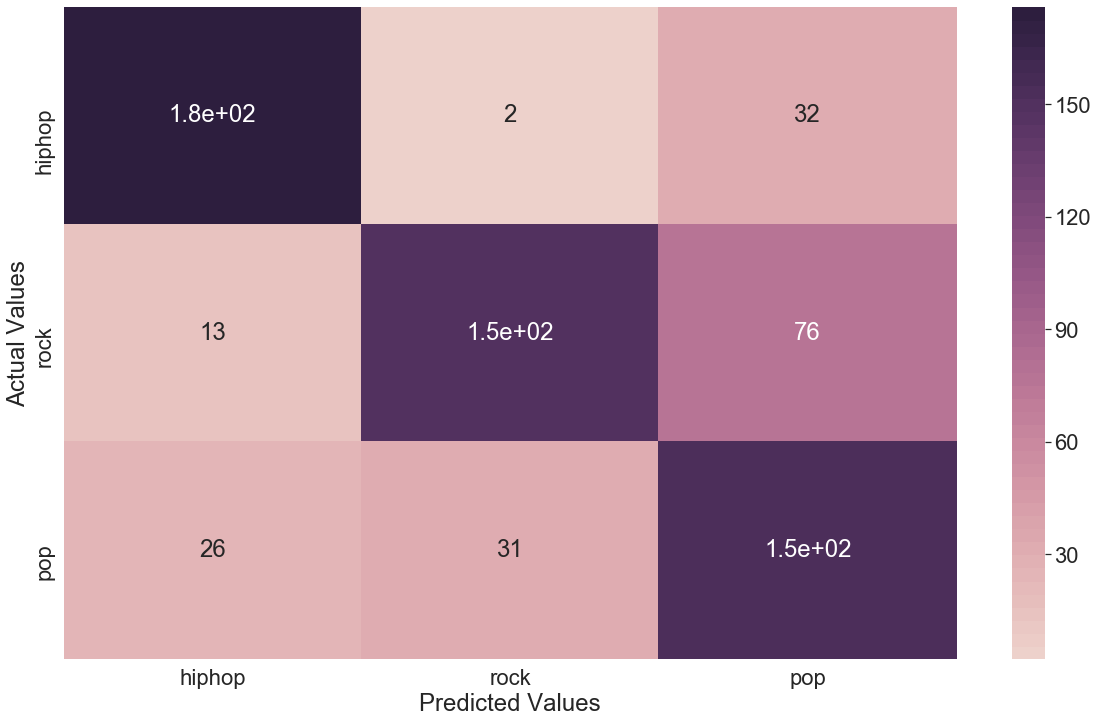

In [38]:
# create a heatmap for the confusion matrix for display
pyplot.figure(figsize= (20,12))
seaborn.set(font_scale = 2);
ax = seaborn.heatmap(confusion_df, annot=True, cmap=seaborn.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

In [39]:
# history.model.save(MOUNTED_DATASET_PATH + '/model/cnn_model.h5')

In [47]:
def train_final_model():
    
    # wrap the function with keras wrapper
    cnn_model = KerasClassifier(
        build_fn=set_shape_create_cnn_model
    )
    
    cnn_model = cnn_model.set_params(**best_model_params)
    
    cnn_model_pipeline_estimator = Pipeline([
        ('pipeline_estimator', pipeline_estimator),
        ('clf', cnn_model)
    ])
    
    cnn_model_pipeline_estimator = cnn_model_pipeline_estimator.fit(
        X, y, clf__batch_size=32, clf__epochs=15
    )
    
    return cnn_model_pipeline_estimator

In [48]:
final_model = train_final_model()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 215, 16)           64        
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 107, 16)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 105, 32)           1568      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 52, 32)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 50, 48)            4656      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 25, 48)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 23, 64)            9280    

In [64]:
pipeline_estimator = final_model.named_steps['pipeline_estimator']
clf = final_model.named_steps['clf']

In [65]:
# save pipeline estimator to disk
pipeline_estimator_path = LOCAL_MOUNTED_DATASET_PATH + '/model/pipeline_estimator.pkl'
joblib.dump(pipeline_estimator, open(pipeline_estimator_path, 'wb'))

In [66]:
#  save keras model to disk
model_path = LOCAL_MOUNTED_DATASET_PATH + '/model/cnn_model.h5'
clf.model.save(model_path)

In [68]:
clf.model.get_weights()

[array([[[-0.30118674,  0.04558779, -0.13362053,  0.05303236,
           0.08700282,  0.1864617 , -0.12946124,  0.02753949,
           0.14392073, -0.32587793, -0.11073571, -0.24666518,
          -0.2182717 , -0.00351404,  0.23417552, -0.1988158 ]],
 
        [[-0.00055609,  0.11136447, -0.05011909, -0.06005668,
           0.17202371,  0.29682252,  0.14472207, -0.00473197,
           0.0044717 ,  0.22908169,  0.26872626, -0.04744068,
          -0.05415091,  0.29715973, -0.19434439,  0.29142752]],
 
        [[ 0.10791295, -0.10363912,  0.15020582,  0.17953126,
           0.16600108, -0.08044922, -0.11443654, -0.02666192,
          -0.31529874, -0.06565209, -0.3700594 ,  0.35794917,
           0.0654262 , -0.2795186 ,  0.03497852,  0.30413106]]],
       dtype=float32),
 array([ 0.0117628 , -0.01195251,  0.00733361, -0.04180008, -0.04215053,
        -0.03430345,  0.00304169, -0.00359803, -0.00071008,  0.02077876,
        -0.00268974, -0.05233721,  0.01582214, -0.02417021, -0.00369286,
   